# Importing the data

In [5]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim
import matplotlib.pyplot as plt
import random as rd

# We want to run it on a GPU if possible (I use Google Colab)
#device=torch.device("cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
# Defining the training parameters
training_parameters = {"n_epochs": 80,"batch_size": 20}

# Importing the full training dataset
dataset_full = datasets.FashionMNIST('./', train = True, download = True, 
                                                 transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]))
# Selecting classes 0 and 2
indexes = (dataset_full.targets==0) | (dataset_full.targets==2)
dataset_full.targets = dataset_full.targets[indexes]
dataset_full.data = dataset_full.data[indexes]

# Creating the DataLoader object
data_loader = torch.utils.data.DataLoader(dataset_full, batch_size=training_parameters["batch_size"], shuffle=True)

# Definition of the models

In [7]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100 + 2#100 is the dimension we chose for the random noise, and 2 corresponds to the number of classes we have
        output_dim = 784#corresponds to 28*28 i.e. the image size
        self.label_embedding = nn.Embedding(10, 2)
        self.hid1 = nn.Sequential(nn.Linear(input_dim, 256),nn.LeakyReLU(0.2))
        self.hid2 = nn.Sequential(nn.Linear(256, 512),nn.LeakyReLU(0.2))
        self.hid3 = nn.Sequential(nn.Linear(512, 1024),nn.LeakyReLU(0.2))
        self.hid4 = nn.Sequential(nn.Linear(1024, output_dim),nn.Tanh())
    
    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x,c], 1)
        output = self.hid1(x)
        output = self.hid2(output)
        output = self.hid3(output)
        output = self.hid4(output)
        return output.to(device)

class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784 + 2
        output_dim = 1
        self.label_embedding = nn.Embedding(10, 2)
        self.hidden_layer1 = nn.Sequential(nn.Linear(input_dim, 1024),nn.LeakyReLU(0.2),nn.Dropout(0.3))
        self.hidden_layer2 = nn.Sequential(nn.Linear(1024, 512),nn.LeakyReLU(0.2),nn.Dropout(0.3))
        self.hidden_layer3 = nn.Sequential(nn.Linear(512, 256),nn.LeakyReLU(0.2),nn.Dropout(0.3))
        self.hidden_layer4 = nn.Sequential(nn.Linear(256, output_dim),nn.Sigmoid())

    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x, c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)

discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (label_embedding): Embedding(10, 2)
  (hid1): Sequential(
    (0): Linear(in_features=102, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hid2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hid3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hid4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

According to PyTorch documentation, the mathematical formula for the loss function we use here is:

$\mathcal{l(x,y) = mean(L) = mean(\begin{pmatrix}l_{1} & ... &  l_{n}\end{pmatrix}^T)}$ where $\mathcal{l_{i} = -w_{i}\left ( y_{i} \cdot  log(x_{i}) + (1-y_{i}) \cdot  log(1 - x_{i})\right )}$

In [8]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()

# Training

[1/80]: loss_d: 0.432, loss_g: 2.316
[2/80]: loss_d: 0.338, loss_g: 2.618
[3/80]: loss_d: 0.372, loss_g: 2.165
[4/80]: loss_d: 0.425, loss_g: 1.870
[5/80]: loss_d: 0.421, loss_g: 1.778
[6/80]: loss_d: 0.436, loss_g: 1.635
[7/80]: loss_d: 0.480, loss_g: 1.455
[8/80]: loss_d: 0.536, loss_g: 1.243
[9/80]: loss_d: 0.559, loss_g: 1.140
Training Epochs Completed:  9
Generated image for label: 2


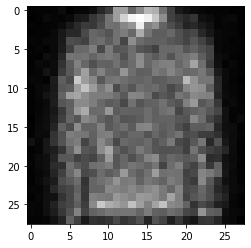

[10/80]: loss_d: 0.581, loss_g: 1.083
[11/80]: loss_d: 0.554, loss_g: 1.165
[12/80]: loss_d: 0.548, loss_g: 1.212
[13/80]: loss_d: 0.557, loss_g: 1.184
[14/80]: loss_d: 0.574, loss_g: 1.074
[15/80]: loss_d: 0.567, loss_g: 1.147
[16/80]: loss_d: 0.570, loss_g: 1.093
[17/80]: loss_d: 0.543, loss_g: 1.283
[18/80]: loss_d: 0.572, loss_g: 1.143
[19/80]: loss_d: 0.581, loss_g: 1.067
Training Epochs Completed:  19
Generated image for label: 2


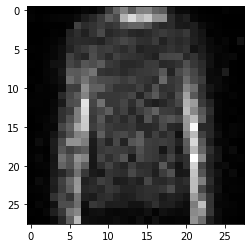

[20/80]: loss_d: 0.571, loss_g: 1.113
[21/80]: loss_d: 0.591, loss_g: 1.069
[22/80]: loss_d: 0.578, loss_g: 1.102
[23/80]: loss_d: 0.578, loss_g: 1.067
[24/80]: loss_d: 0.599, loss_g: 1.039
[25/80]: loss_d: 0.583, loss_g: 1.064
[26/80]: loss_d: 0.593, loss_g: 1.047
[27/80]: loss_d: 0.591, loss_g: 1.030
[28/80]: loss_d: 0.594, loss_g: 1.010
[29/80]: loss_d: 0.591, loss_g: 1.042
Training Epochs Completed:  29
Generated image for label: 0


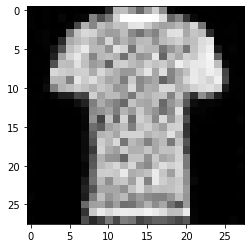

[30/80]: loss_d: 0.592, loss_g: 1.060
[31/80]: loss_d: 0.588, loss_g: 1.047
[32/80]: loss_d: 0.610, loss_g: 1.001
[33/80]: loss_d: 0.600, loss_g: 0.988
[34/80]: loss_d: 0.617, loss_g: 0.960
[35/80]: loss_d: 0.609, loss_g: 0.959
[36/80]: loss_d: 0.606, loss_g: 1.015
[37/80]: loss_d: 0.599, loss_g: 1.013
[38/80]: loss_d: 0.609, loss_g: 0.995
[39/80]: loss_d: 0.609, loss_g: 1.029
Training Epochs Completed:  39
Generated image for label: 0


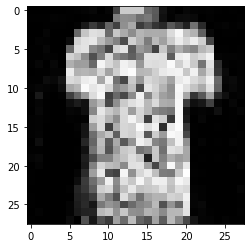

[40/80]: loss_d: 0.616, loss_g: 0.974
[41/80]: loss_d: 0.606, loss_g: 0.998
[42/80]: loss_d: 0.606, loss_g: 0.989
[43/80]: loss_d: 0.616, loss_g: 0.954
[44/80]: loss_d: 0.610, loss_g: 0.977
[45/80]: loss_d: 0.621, loss_g: 0.967
[46/80]: loss_d: 0.602, loss_g: 0.970
[47/80]: loss_d: 0.613, loss_g: 0.988
[48/80]: loss_d: 0.609, loss_g: 0.977
[49/80]: loss_d: 0.607, loss_g: 0.980
Training Epochs Completed:  49
Generated image for label: 0


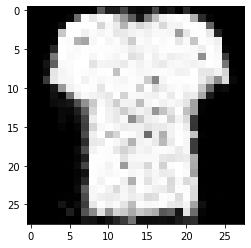

[50/80]: loss_d: 0.608, loss_g: 1.033
[51/80]: loss_d: 0.610, loss_g: 0.977
[52/80]: loss_d: 0.620, loss_g: 0.958
[53/80]: loss_d: 0.619, loss_g: 0.960
[54/80]: loss_d: 0.617, loss_g: 0.968
[55/80]: loss_d: 0.626, loss_g: 0.928
[56/80]: loss_d: 0.624, loss_g: 0.951
[57/80]: loss_d: 0.621, loss_g: 0.960
[58/80]: loss_d: 0.619, loss_g: 0.947
[59/80]: loss_d: 0.616, loss_g: 0.952
Training Epochs Completed:  59
Generated image for label: 0


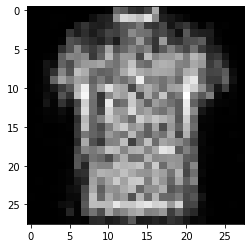

[60/80]: loss_d: 0.616, loss_g: 0.948
[61/80]: loss_d: 0.624, loss_g: 0.945
[62/80]: loss_d: 0.626, loss_g: 0.941
[63/80]: loss_d: 0.622, loss_g: 0.943
[64/80]: loss_d: 0.622, loss_g: 0.961
[65/80]: loss_d: 0.626, loss_g: 0.933
[66/80]: loss_d: 0.620, loss_g: 0.942
[67/80]: loss_d: 0.635, loss_g: 0.907
[68/80]: loss_d: 0.634, loss_g: 0.908
[69/80]: loss_d: 0.630, loss_g: 0.932
Training Epochs Completed:  69
Generated image for label: 2


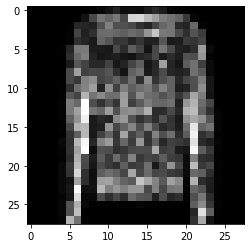

[70/80]: loss_d: 0.624, loss_g: 0.965
[71/80]: loss_d: 0.614, loss_g: 1.025
[72/80]: loss_d: 0.601, loss_g: 1.011
[73/80]: loss_d: 0.615, loss_g: 0.978
[74/80]: loss_d: 0.617, loss_g: 0.960
[75/80]: loss_d: 0.628, loss_g: 0.919
[76/80]: loss_d: 0.632, loss_g: 0.908
[77/80]: loss_d: 0.631, loss_g: 0.934
[78/80]: loss_d: 0.624, loss_g: 0.935
[79/80]: loss_d: 0.630, loss_g: 0.926
Training Epochs Completed:  79
Generated image for label: 2


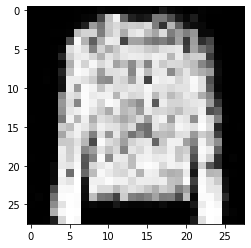

[80/80]: loss_d: 0.630, loss_g: 0.930


In [9]:
n_epochs = training_parameters["n_epochs"]
batch_size = training_parameters["batch_size"]
G_loss = [0]*n_epochs
D_loss = [0]*n_epochs
for epoch_idx in range(n_epochs):
    G_loss_tmp = []
    D_loss_tmp = []
    for batch_idx, data_input in enumerate(data_loader):
        # Generating fake images
        noise = torch.randn(batch_size,100).to(device)
        fake_labels = (2*torch.randint(0, 2, (batch_size,))).to(device)
        generated_data = generator(noise, fake_labels)# this generate batch_size vectors of dimension 784 ie batch_size fake images

        # Discriminator part
        true_data = data_input[0].view(batch_size, 784).to(device)# this corresponds to batch_size real images
        clothes_labels = data_input[1].to(device)# and their corresponding batch_size categories (t-shirt or pullover)
        true_labels = torch.ones(batch_size).to(device)# as these are real images, we associate them to 1 which is the label for 'real image'
        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data, clothes_labels).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach(), fake_labels).view(batch_size)
        generator_discriminator_loss = loss(discriminator_output_for_generated_data, torch.zeros(batch_size).to(device))

        discriminator_loss = (true_discriminator_loss + generator_discriminator_loss) / 2
        discriminator_loss.backward()
        discriminator_optimizer.step()
        D_loss_tmp.append(discriminator_loss.data.item())
        
        # Generator part
        generator_optimizer.zero_grad()
        generated_data = generator(noise, fake_labels)
        discriminator_output_on_generated_data = discriminator(generated_data, fake_labels).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss_tmp.append(generator_loss.data.item())
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Epochs Completed: ", epoch_idx)
            
            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                fake_labels = (2*torch.randint(0, 2, (batch_size,))).to(device)
                generated_data = generator(noise, fake_labels).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    print("Generated image for label:", fake_labels[0].item())
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()
                    break

    G_loss[epoch_idx] = torch.mean(torch.FloatTensor(G_loss_tmp))
    D_loss[epoch_idx] = torch.mean(torch.FloatTensor(D_loss_tmp))
    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx)+1, n_epochs, torch.mean(torch.FloatTensor(D_loss_tmp)), torch.mean(torch.FloatTensor(G_loss_tmp))))

# Loss curves

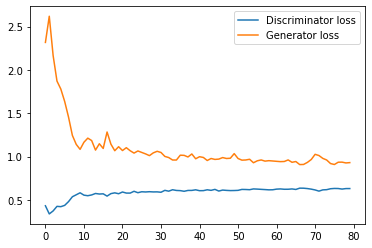

In [10]:
plt.figure()
plt.plot(D_loss)
plt.plot(G_loss)
plt.legend(["Discriminator loss", "Generator loss"])
plt.show()

# Example of generated images versus real images

Real image with label 2


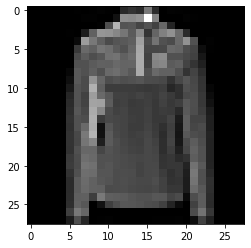

Real image with label 2


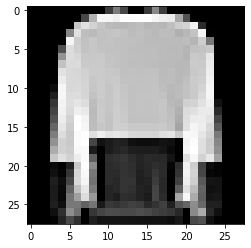

Real image with label 0


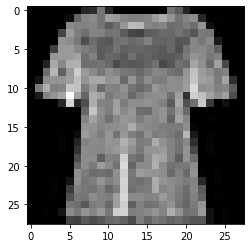

Real image with label 2


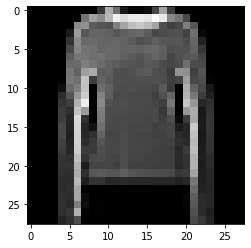

Fake image generated with label 2


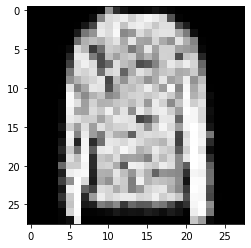

Fake image generated with label 0


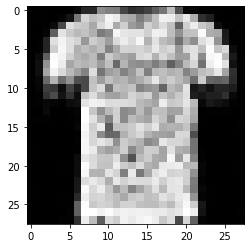

In [20]:
c=0
for image,label in data_loader:
    print("Real image with label",label[0].item())
    plt.imshow(image.numpy()[0][0], cmap='gray')
    plt.show()
    if c == 3:
        break
    else:
        c+=1

c=0
with torch.no_grad():
    noise = torch.randn(2,100).to(device)
    fake_labels = torch.tensor([2, 0]).to(device)
    generated_data = generator(noise, fake_labels).cpu().view(2, 28, 28)
    i = 0
    for x in generated_data:
        print("Fake image generated with label", fake_labels[i].item())
        plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
        plt.show()
        i+=1

# Accuracy of the discriminator

In [49]:
# Generation of 1k fake images
with torch.no_grad():
    noise = torch.randn(1000,100).to(device)
    fake_labels = (2*torch.randint(0, 2, (1000,))).to(device)# dimension 1000x1
    generated_data = generator(noise, fake_labels).to(device).view(1000, 28, 28)# dimension 1000x28x28 i.e. 1000 images

In [95]:
# Sampling of 1k real images
dataset_test = datasets.FashionMNIST('./', train = False, download = True, 
                                                 transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))]))
indexes = (dataset_test.targets==0) | (dataset_test.targets==2)
dataset_test.targets = dataset_test.targets[indexes]
dataset_test.data = dataset_test.data[indexes]
true_labels = dataset_test.targets[0:1000].to(device)
true_images = dataset_test.data[0:1000].to(device)

# We concatenate to create the testing dataset
test_labels = torch.cat((fake_labels, true_labels))# 2000 labels
test_images = torch.cat((generated_data, true_images))# 2000 images
print(test_labels.size())
print(test_images.size())

torch.Size([2000])
torch.Size([2000, 28, 28])


In [97]:
# Testing the discriminator
acc = 0
discriminator_output = discriminator(test_images.detach(), test_labels)

for i in range(2000):
    if i<1000:#if we are in the first 1000 inputs, the image is fake
        if discriminator_output[i]==0:#so we should have 0 as output of the discriminator
            acc += 1
    else:# if we are in the last 1000 inputs, the image is real
        if discriminator_output[i]==1:#so we should have 1 as output of the discriminator
            acc += 1
acc = acc/2000
print("The accuracy of the discriminator on the testing dataset is:", acc)

RuntimeError: ignored

# How easy/hard is this task for the classifier? Why?

For the classifier, the task may be quite difficult. The generator will probably try to learn that sleeves are shorter for the t-shirts, which means that in the area where the sleeve stops for the t-shirt, we should observe a strong a marked difference between the black of the background and the white of the clothing. We see during the training that the generator ends up generating good examples for each of the classes. So the shape is not really a problem for the generator. Maybe it would have been different if we considered classes of clothing with very different shapes. The main difference between the fake and the real images is that the color on the center of the garment on the real images is often more solid than on the fake images.